# Homework 2-5 review

## Homework 2
Write code to sort a list of numeric values in asending order with "buble sort" and/or "insertion sort". Create and Use a 50-element list with random numbers between 1 and 100. Do not use any existing python function. Your code must work for any given list.

Hint: search "sorting algorithms" in google.

The full score of the homework will be 10. If you successfully implement 1 sorting algorithm, you will have a score 9. If you can implement two or more algorithms, you will have the full score.

Codes with clear comments will accont for 2 points of your score.

Put it to the same github repository that you shared with me last time.

In [10]:
# define the bubble sort function
# input: a list to be sorted
# output: the sorted list in asending order
def bubbleSort(L1):
    # L1: input list
    # get the length of L1
    n = len(L1)
    
    # n-1 pass
    for i in range(0, n-1):
        # because we move the biggest number to the end of the list
        # we only need to check the elements from the first (0th) to
        # the n-i-1 th element
        for j in range(0, n-i-1): 
            # swap list elements if the order is not ascending
            if L1[j] > L1[j+1]:
                L1[j],L1[j+1] = L1[j+1],L1[j]
    return L1

# generate a list of random number
import random
L1=random.sample(range(1,100), 50)

print("Unsorted list is:", L1)

# call bubblesort function
L2 = bubbleSort(L1)

print("Sorted list is:", L2)

Unsorted list is: [42, 86, 7, 82, 32, 64, 6, 93, 35, 97]
[42, 86, 7, 82, 32, 64, 6, 93, 35, 97]
[42, 7, 82, 32, 64, 6, 86, 35, 93, 97]
[7, 42, 32, 64, 6, 82, 35, 86, 93, 97]
[7, 32, 42, 6, 64, 35, 82, 86, 93, 97]
[7, 32, 6, 42, 35, 64, 82, 86, 93, 97]
[7, 6, 32, 35, 42, 64, 82, 86, 93, 97]
[6, 7, 32, 35, 42, 64, 82, 86, 93, 97]
[6, 7, 32, 35, 42, 64, 82, 86, 93, 97]
[6, 7, 32, 35, 42, 64, 82, 86, 93, 97]
Sorted list is: [6, 7, 32, 35, 42, 64, 82, 86, 93, 97]


In [75]:
# define the Insertion sort function
# input: a list to be sorted
# output: the sorted list in asending order
def InsertionSort(L1):
    # L1: input list
    # get the length of L1
    n = len(L1)
    
    # pass from the 2nd (index 1) element to the last element (index n-1)
    for i in range(1, n):
        # i is the current element
        # go through the elements before the current element
        for j in range(0, i): 
            # if the current element is smaller than a previous element
            if L1[i] < L1[j]:
                # insert the current element before the previous element
                L1.insert(j, L1[i])
                # delete the current element; using i+1 because the insertion added 1 element to the list
                L1.pop(i+1)
    return L1

# generate a list of random number
import random
L1=random.sample(range(1,100), 50)

print("Unsorted list is:", L1)

# call bubblesort function
L2 = InsertionSort(L1)

print("Sorted list is:", L1)

Unsorted list is: [37, 61, 75, 29, 82, 51, 41, 90, 44, 87, 7, 72, 48, 79, 39, 32, 31, 47, 12, 80, 46, 96, 36, 53, 9, 42, 24, 76, 10, 30, 1, 58, 23, 93, 55, 34, 45, 63, 89, 85, 84, 78, 83, 88, 59, 92, 77, 26, 14, 95]
Sorted list is: [1, 7, 9, 10, 12, 14, 23, 24, 26, 29, 30, 31, 32, 34, 36, 37, 39, 41, 42, 44, 45, 46, 47, 48, 51, 53, 55, 58, 59, 61, 63, 72, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 92, 93, 95, 96]


## Homework 3
- Import the Mauna Loa CO2 data (MaunaLoaCO2_monthly_sitename.csv) used in Class as a pandas data frame. (1 pt)
- Create a new data frame with columns "Year", "annual_average", "deseasonalized_annual_average", "std_of_months" (1 pt)
- exclude the years of 1958 and 2022 (1 pt)
- exclude the years in which "numofdays" or "stdofdays" are filled values (e.g., negative values) (1 pt)
- Calculate the annual average CO2 concentration from the "Monthly_average" values, and store it in the column of "annual_average" (1 pt)
- Calculate the annual average deseasonalized CO2 concentration from the "deseasonalized" values, and store it in the column of "deseasonalized_annual_average" (1 pt)
- Calculate the standard deviation of the 12-month values for each year and put it into the column of "std_of_months" (1 pt)
- Detailed comments (2 pt)
- save the new data frame into a csv file named as YourLastName_MaunaLoaCO2_annual_Hw3.csv
- push your code and the saved csv file to your private github repo as last time.

In [89]:
import os
import pandas as pd

# assign file name
filename = os.path.join(os.getcwd(), "Lec7", "MaunaLoaCO2_monthly_sitename.csv")

# read data
data = pd.read_csv(filename, delimiter=',')

# Create a new data frame with columns "Year", "annual_average", "deseasonalized_annual_average", "std_of_months" (1 pt)
df = pd.DataFrame(columns = ["Year", "annual_average", "deseasonalized_annual_average", "std_of_months"])

# exclude the years of 1958 and 2022 (1 pt)
data = data[(data["Year"]!=2015) & (data["Year"]!=1958)]

# exclude the years in which "numofdays" or "stdofdays" are filled values (e.g., negative values) (1 pt)
f = (data['numofdays']<0) | (data['stdofdays']<0)
invalidyears = data['Year'][f].unique()

for i in range(0, len(invalidyears)):
    data = data[data["Year"] != invalidyears[i]]
data

# Calculate the annual average CO2 concentration from the "Monthly_average" values, and store it in the column of "annual_average" (1 pt)
df["Year"] = data["Year"].unique()
for i in data["Year"].unique():
    df.loc[df.Year==i,"annual_average"] = data["Monthly_average"][data["Year"]==i].mean()

# Calculate the annual average deseasonalized CO2 concentration from the "deseasonalized" values, and store it in the column of "deseasonalized_annual_average" (1 pt)
for i in data["Year"].unique():
    df.loc[df.Year==i,"deseasonalized_annual_average"] = data["deseasonalized"][data["Year"]==i].mean()

# Calculate the standard deviation of the 12-month values for each year and put it into the column of "std_of_months" (1 pt)
for i in data["Year"].unique():
    df.loc[df.Year==i,"std_of_months"] = data["Monthly_average"][data["Year"]==i].std()

# save the new data frame into a csv file named as YourLastName_MaunaLoaCO2_annual_Hw3.csv
df.to_csv('Chen_MaunaLoaCO2_annual_Hw3.csv',index = False)

## Homework 4
The TRENDYdata.csv records the results of a global terrestrial biosphere model (TBM) for simulating terrestrial ecosystem carbon cycling from 1700 to 2017. Scientists are interested in the relationship between the global mean NPP (net primary productivity; the net carbon sequestration by plants) and tas (land surface temperature) but different TBMs may have different results. You are asked to help bulid a simple linear model that predicts NPP with tas (NPP = a*tas+b) for each TBM. DO NOT use the existing functions in python and packages that can directly give you the answer. Please use scipy's optimize package to find the best a and b parameters for your model. Save your code and the optimized a and b in a table in a Jupyter Notebook Markdown file and put it into your homework github repo. Due before the class on next Tuesday.

,Model,a,b
0,CABLE-POP,14.080698,-3818.737483
1,CLASS-CTEM,5.774909,-1471.295286
2,CLM5.0,7.717724,-2132.45269
3,DLEM,8.909456,-2485.53601
4,JSBACH,14.346197,-3775.75973
5,JULES,10.037562,-2747.326428
6,LPX,6.493538,-1777.311935
7,ORCHIDEE,7.025416,-1961.13139
8,VISIT,8.226249,-2220.800002


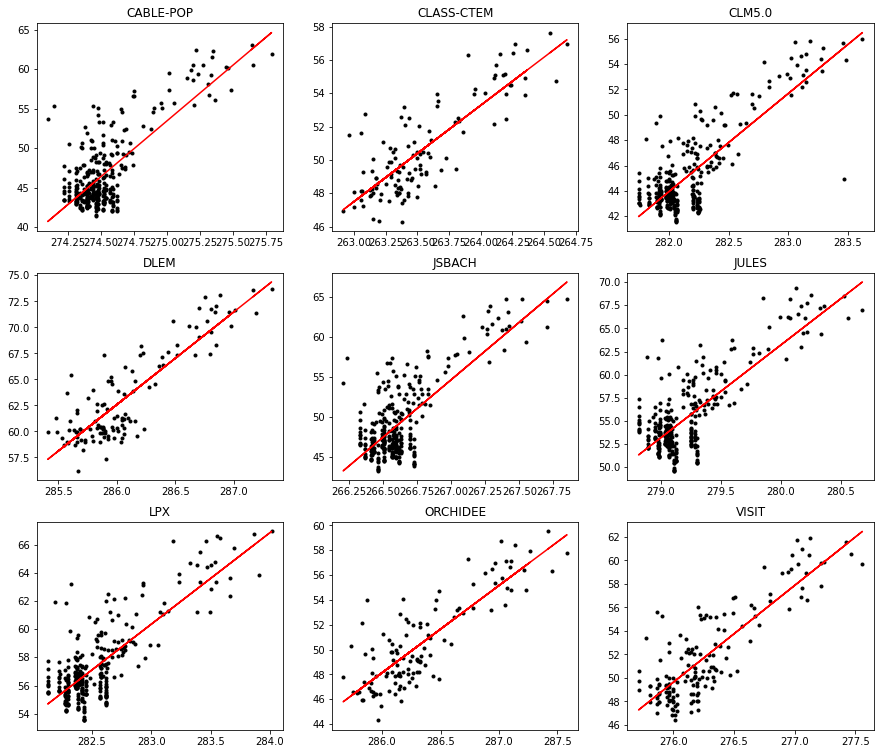

In [98]:
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt

def costfunc(param, tas, NPP):
    a, b = param
    NPPpred = a * tas + b
    return (np.mean((NPPpred - NPP)**2))**0.5


# assign file name
filename = os.path.join(os.getcwd(), "Lec9", "TRENDYdata.csv")

DF = pd.read_csv(filename)
DF = DF.loc[DF.tas<1000,]

nmodels = len(DF.Model.unique())
fig, axs = plt.subplots(3,3, figsize=(15, 13),sharex=False, sharey=False)

results = pd.DataFrame(columns = ["Model", "a", "b"])
results.Model = DF.Model.unique()

i = 0
for model in DF.Model.unique():
    subdf = DF.loc[DF.Model==model,]
    
    guess = [subdf.npp.mean()/subdf.tas.mean(), subdf.npp.mean() - subdf.tas.mean()]
    mymin = minimize(costfunc, guess, args=(subdf.tas, subdf.npp))
    a, b = mymin.x
    
    results.iloc[i].Model = model
    results.iloc[i].a = a
    results.iloc[i].b = b
    
    m = int(i/3)
    n = i - m*3

    axs[m,n].plot(subdf.tas, subdf.npp, 'k.')
    axs[m,n].plot(subdf.tas, a*subdf.tas+b, 'r-')
    axs[m,n].set_title(model)
        
    i += 1

results

## Homework 5
In 2021, a paper was published on Nature entitled "A 10 per cent increase in global land evapotranspiration from 2003 to 2019". But this paper was retracted by the auhtors in the last week.

The main reason is that the authors made a mistake in caculating the global mean evapotranspiration by missing the area weights.

In this home work, you are expected to:

Calculate the global average (both area-weighted and not weighted) annual evapotranspiration (LE) from 2000 to 2014 using the provided FLUXCOM dataset. (3 pts)

Visualize the time series of the global annual LE (weighted and not weighted) with different colors/line styles (up to you, but we must see the difference between these two data). x axis is year and y axis is LE. Add trend lines with fitted linear regression functions (LE = a*year+b) to the chart. (5 pts)

Visualize unweighted 15-year mean LE map in robinson projection with colorbar. (2pts)

Pascolini-Campbell, M., Reager, J.T., Chandanpurkar, H.A. et al. RETRACTED ARTICLE: A 10 per cent increase in global land evapotranspiration from 2003 to 2019. Nature 593, 543–547 (2021). https://doi.org/10.1038/s41586-021-03503-5



In [115]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import pandas as pd

startyear = 2000
endyear = 2014

results = pd.DataFrame(columns = ["Year", "weighted_average_LE", "no_weighted_average_LE"])
results.Year = range(startyear, endyear+1)

for year in range(startyear, endyear+1):
    filename = "LE.RS_METEO.EBC-BWR.MLM-MARS.METEO-GSWP3.720_360.monthly." + str(year) + ".nc"
    filenamepath = os.path.join(os.getcwd(), "Lec11", "FLUXCOM", filename)
    ds = nc.Dataset(filenamepath)
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    LE = ds.variables['LE'][:]
    
    if (year==startyear):
        weight1d = np.cos(np.deg2rad(lat))
        weight2d = np.transpose(np.tile(weight1d, (720, 1)))
        weight3d = np.tile(weight2d, (12, 1, 1))
        
    y = np.average(LE)
    yw = np.average(LE, weights=weight3d)

    results.loc[results.Year == year, "no_weighted_average_LE"] = y
    results.loc[results.Year == year, "weighted_average_LE"] = yw

results

,Year,weighted_average_LE,no_weighted_average_LE
0,2000,1.02985,3.764979
1,2001,1.020305,3.731022
2,2002,1.007828,3.690268
3,2003,1.016382,3.719925
4,2004,1.021823,3.739574
5,2005,1.015715,3.724173
6,2006,1.023376,3.739714
7,2007,1.019735,3.734266
8,2008,1.017012,3.724469
9,2009,1.019581,3.729636


Text(2000, 3.76, '$y=-0.0009972480150629076*x+5.731228841292179$')

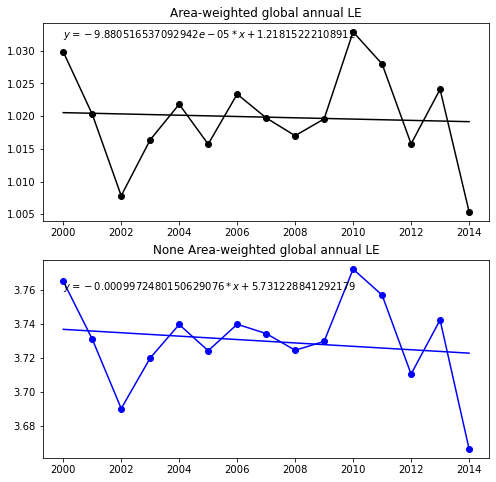

In [147]:
fig, axs = plt.subplots(2,1, figsize=(8, 8))

x = np.array(results.Year, dtype=float)
y = np.array(results.weighted_average_LE, dtype=float)
axs[0].plot(x, y, 'k-o')
axs[0].set_title("Area-weighted global annual LE")
a, b = np.polyfit(x, y, 1)
axs[0].plot(x, a*x+b, 'k-')
axs[0].text(2000, 1.032, r'$y=%s*x+%s$'%(a,b), fontsize=10)


y = np.array(results.no_weighted_average_LE, dtype=float)
axs[1].plot(x, y, 'b-o')
axs[1].set_title("None Area-weighted global annual LE")
a, b = np.polyfit(x, y, 1)
axs[1].plot(x, a*x+b, 'b-')
axs[1].text(2000, 3.76, r'$y=%s*x+%s$'%(a,b), fontsize=10)


In [158]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import pandas as pd

startyear = 2000
endyear = 2014

for year in range(startyear, endyear+1):
    filename = "LE.RS_METEO.EBC-BWR.MLM-MARS.METEO-GSWP3.720_360.monthly." + str(year) + ".nc"
    filenamepath = os.path.join(os.getcwd(), "Lec11", "FLUXCOM", filename)
    ds = nc.Dataset(filenamepath)
    LE = ds.variables['LE'][:]
    LEmap = LE.mean(axis=0)
    
    if year == startyear:
        allLEmap = LEmap
    else:
        allLEmap = allLEmap + LEmap
allLEmap = allLEmap / (endyear-startyear+1)

/var/folders/5z/gl6s_gjx0z348sf6tz0gx2hw0000gn/T/ipykernel_49977/248884535.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  m.pcolormesh(xx, yy, allLEmap,


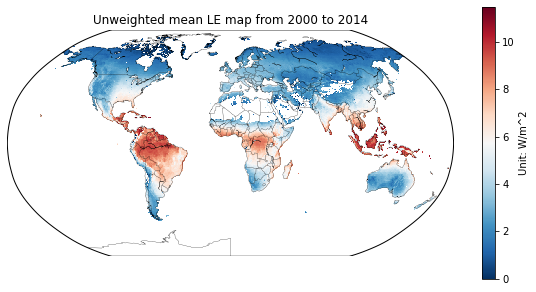

In [163]:
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

fig,ax = plt.subplots(figsize=(10,5))
m = Basemap(projection='robin',
            lat_0=0, lon_0=0) 

m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25)


xx, yy = np.meshgrid(lon, lat)
m.pcolormesh(xx, yy, allLEmap,
             latlon=True,
             cmap='RdBu_r')

plt.title('Unweighted mean LE map from 2000 to 2014')
plt.colorbar(label='Unit: W/m^2');